In [62]:
import pandas 

%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' )

from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [63]:
features = pandas.read_csv( '../rosetta_runs/shells/feature_set.csv', index_col=0 ) 
data = pandas.read_csv( '../data_sets/experimental/targets.csv', index_col=0 )

In [64]:
len( features ) 

8654

In [65]:
data.head()

,expression,tm,kcat,km,kcatkm
mutant,,,,,
G12N,0,NaN,NaN,NaN,NaN
S14A,1,0.23,-0.439333,-0.217484,-0.651460
T15A,1,-0.76,-0.156314,-0.025306,-0.176657
S16A,1,-0.52,-0.756962,-0.447468,-1.199275
S16N,0,NaN,NaN,NaN,NaN


In [66]:
plt.subplot?

kcat


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: Converg

0.0480878952261


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes

                 kcat
description          
T161P       -0.858231
D322W       -0.835771
L97P        -0.808316
R338P       -0.778896
Q19W        -0.716769
H58P        -0.682855
E259P       -0.636816
L196P       -0.615910
G174P       -0.606233
K345P       -0.212710


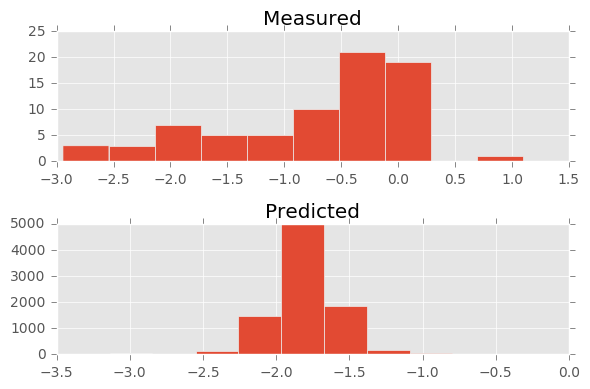

km


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: Converg

-0.0476353272294


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes

                   km
description          
C383W        0.497945
G174H        0.506669
G174F        0.522627
C54W         0.523921
E164L        0.564370
G174W        0.588891
G174Y        0.592882
N354W        0.665276
L336Y        0.680202
G355K        0.843568


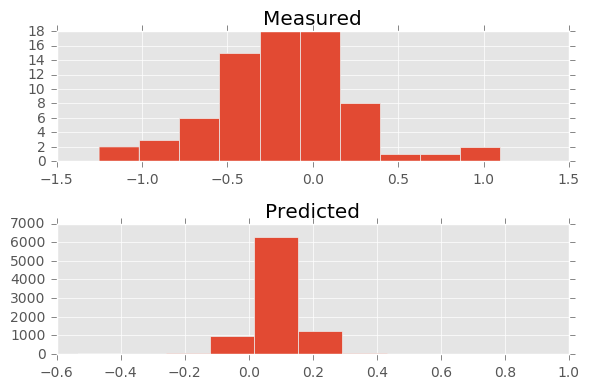

kcatkm


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: Converg

0.0439629725587


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes

               kcatkm
description          
V311P       -1.111540
K394D       -1.057998
C167D       -1.053554
K209P       -1.025163
K437E       -0.999258
K345P       -0.993076
K381E       -0.977993
I351W       -0.927012
W399V       -0.919277
G174P       -0.635217


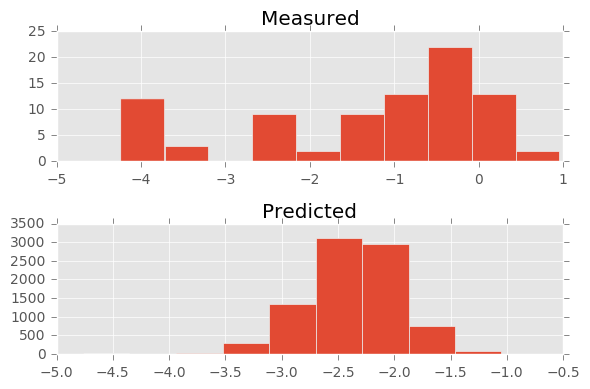

tm


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: Converg

-0.00587382352906


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes

                   tm
description          
L380K        2.133024
T116K        2.136184
I162R        2.175987
Q19R         2.182587
T352K        2.253520
N293S        2.267650
N220V        2.361105
N293G        2.558001
E164R        2.598428
S14R         2.782078


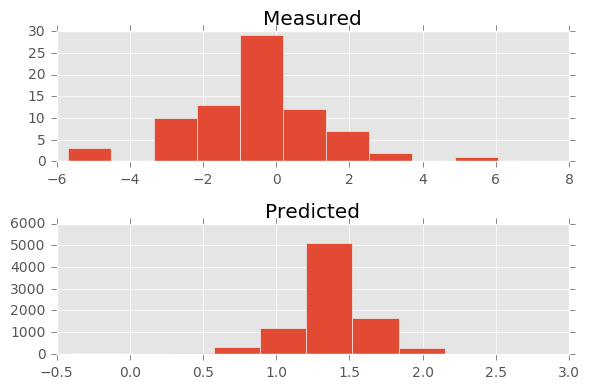

In [67]:
params = [ 'kcat', 'km', 'kcatkm', 'tm' ]
for param in params:
    print( param ) 
    
    scl = MinMaxScaler()
    scl2 = MinMaxScaler()
    var = VarianceThreshold(0.0)

    J = data[ [ param ] ].join( features ).dropna()
    
    list_novel = [ i for i in features.index if i not in J.index ] 
    novel = features.loc[ list_novel ] 
    novel_X = scl2.fit_transform( novel ) 
    
    y = J.ix[ : , 0 ].ravel()
    X = var.fit_transform( scl.fit_transform( J.ix[ : , 1: ] ) ) 
    
    clf = BaggingRegressor( ElasticNetCV( cv=10 ), n_estimators=100, n_jobs=-1, oob_score=True )
    clf.fit( X, y ) 
    print( clf.oob_score_ ) 
    
    preds = clf.predict( novel_X )  
    results = pandas.DataFrame( preds, index=novel.index, columns=[ param ] )
    print( results.sort_values( by=param ).tail( 10 ) ) 
    
    plt.figure() 
    plt.subplot?
    plt.subplot( 2, 1, 1 )
    plt.hist( y ) 
    plt.title( 'Measured' ) 
    plt.subplot( 2, 1, 2 )
    plt.hist( preds ) 
    plt.title( 'Predicted' ) 
    plt.tight_layout()
    plt.show()
    

#     print( X.shape, y.shape ) 